In [ ]:
# Section 1 - Linear Regression with Least Squares

In [1]:
# Import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

#Read the data set and display the first five rows
tr_path = 'train.csv'
data = pd.read_csv(tr_path)

print("Data loaded successfuly. Here are the first 5 rows:")
data.head()

Data loaded successfuly. Here are the first 5 rows:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# NOTE: Basic Exploratory Data Analysis
# -------------------------------------
# We will perform a basic inspection to understand
# its structure. We will check the dimensions (rows and columns),
# then get a summary of the data type, and  explicitly list all the column names.
#
# Why we are doing it:
# This is a critical first step in any data analysis project. It allows us to
# verify that the data has been loaded correctly and to get a complete,
# high-level summary of the dataset's contents before we begin more detailed
# analysis or visualization.

In [5]:
# Get the dimensions of the DataFrame (rows, columns)
print("Shape of the DataFrame:")
print(data.shape)

# Get a concise summary of the DataFrame, including data types
print("\nDataFrame Info:")
data.info()

# List all the column names
print("\nColumn Names:")
print(data.columns)

Shape of the DataFrame:
(1460, 81)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  

In [7]:
# NOTE: Analyzing the EDA Results
# ---------------------------------
# - Dimensions: The `.shape` attribute confirms the DataFrame has **1460 rows**
#   and **81 columns**.
# - Data Types: The `.info()` output shows the data type for each column.
#   This confirms that 'Id' and 'SalePrice' are both `int64` (integer) types
# - Column Names: The `data.columns` command lists all 81 column headers,
#   allowing us to see every feature available.

In [9]:
#
# NOTE: Initial Visualization of Key Variables
# ---------------------------------------------
# What we are doing:
# We are creating a scatter plot to visualize the relationship between two key
# variables from our dataset: 'GrLivArea' (the above-ground living area) and
# 'SalePrice'.
#
# Why we are doing it:
# Before building a model, it is essential to visually inspect the data to see
# if a relationship exists between our predictor variable and the target variable.
#
# For linear regression to be effective, there should be a generally linear
# trend. This plot will help us confirm that assumption.
#

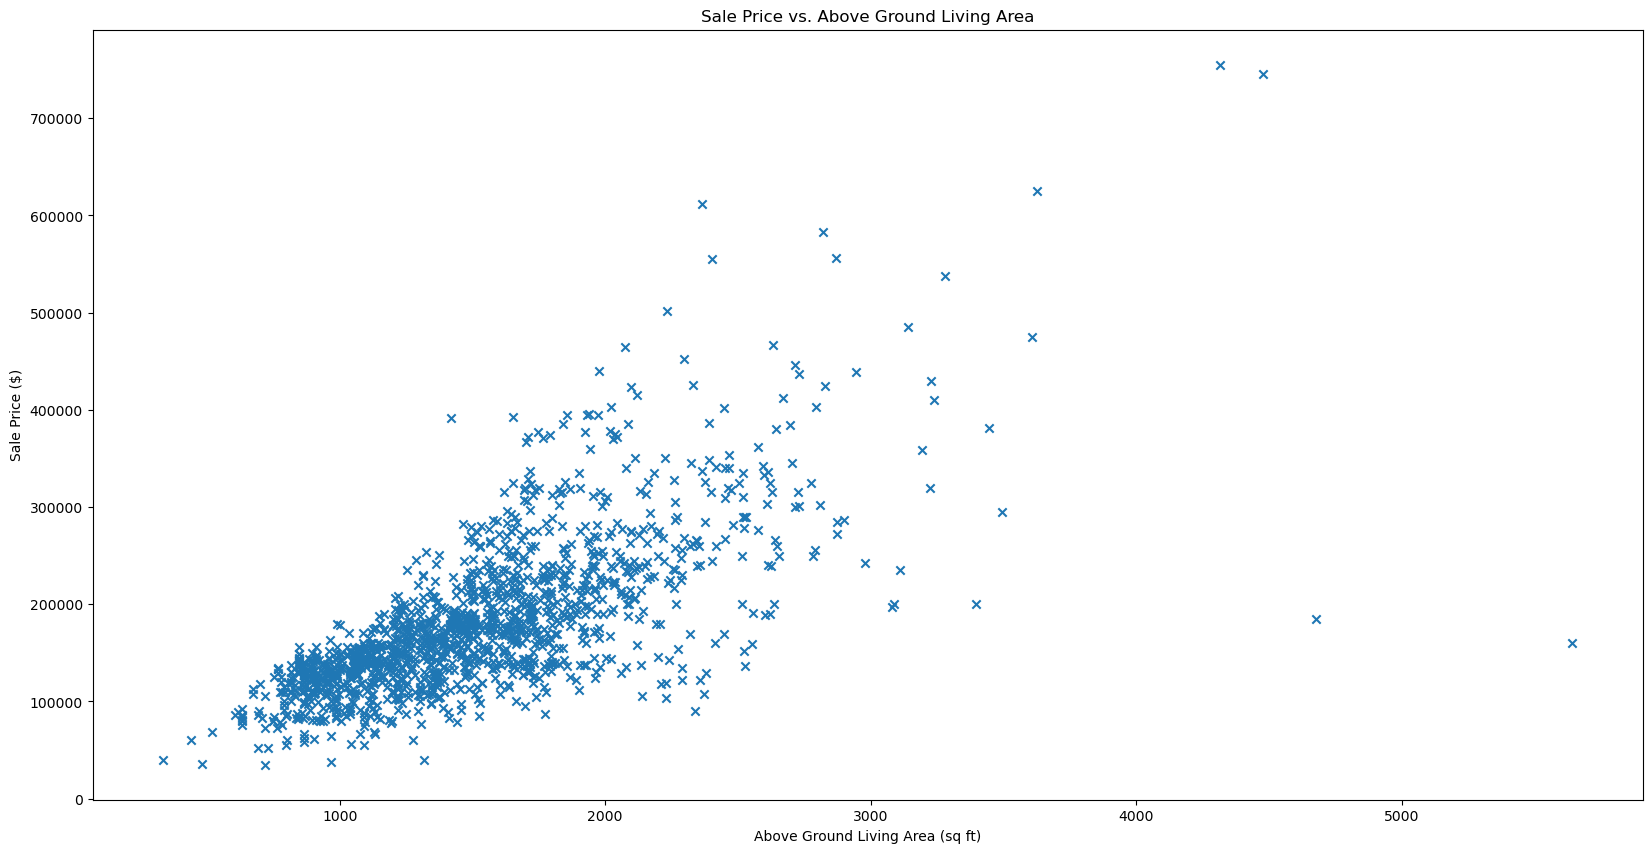

In [11]:
X = data ['GrLivArea']
Y = data ['SalePrice']

plt.scatter(X, Y, marker ="x")

plt.xlabel('Above Ground Living Area (sq ft)')
plt.ylabel('Sale Price ($)')
plt.title('Sale Price vs. Above Ground Living Area')
plt.show()

In [13]:
#
# NOTE: Analyzing the Scatter Plot
# ----------------------------------
# The plot clearly shows a positive linear relationship: as the living
# area increases, the sale price generally increases as well. This visual
# confirmation supports the use of a linear regression model for this problem.
#
# Notice the two houses in the bottom right with very large living areas but
# unusually low sale prices.
# These points could negatively influence our model's fit.
# 

In [15]:
#
# NOTE: Defining a Function for the Matrix Inverse
# ------------------------------------------------
# What we are doing:
# We are creating a function called `inverse_of_matrix` that takes a matrix
# (represented as a NumPy array) as input and calculates its inverse. The inverse
# is a fundamental concept in linear algebra.
#
# Why we are doing it:
# Calculating the inverse of a matrix is a key mathematical operation required
# to solve the Normal Equation for Ordinary Least Squares (OLS) regression.
# The Normal Equation is the analytical solution that directly calculates the
# optimal weights for our model.
#

In [17]:
def inverse_of_matrix(mat):
    """Calculate and return the multiplicative inverse of a matrix.
    
    Positional argument:
        mat -- a square matrix to invert
    
    Example:
        sample_matrix = [[1, 2], [3, 4]]
        the_inverse = inverse_of_matrix(sample_matrix)
        
    Requirements:
        This function depends on the numpy function `numpy.linalg.inv`. 
    """
    matrix_inverse = np.linalg.inv(mat)
    return matrix_inverse

# This cell only defines the function, so there is no output.
print("Function 'inverse_of_matrix' has been defined and is ready to use.")

Function 'inverse_of_matrix' has been defined and is ready to use.


In [19]:
#
# NOTE: Defining the Data Loading Function
# ----------------------------------------
# What we are doing:
# Creating a  function called `read_to_df`. This
# function will take a file path as input and use the pandas library to read
# the corresponding CSV file into a data table; a DataFrame.
#
# Why we are doing it:
# We must load our data into the notebook's memory before we can do any analysis.
# Putting code inside a function is a fundamental concept in programming that makes
# the code more reusable and organized.
#

In [21]:
def read_to_df(file_path):
    """Read on-disk data and return a dataframe."""
    
    df = pd.read_csv(file_path)
    return df

# This cell only defines the function, so there is no output.
print("Function 'read_to_df' has been defined and is ready to use.")

Function 'read_to_df' has been defined and is ready to use.


In [23]:
#
# NOTE: Defining a Function to Select Columns
# -------------------------------------------
# What we are doing:
# Creating a function called `select_columns` that takes a DataFrame and
# a list of column names as input. This function will return a new, smaller
# DataFrame that contains only the columns specified in the list.
#
# Why we are doing it:
# Our full dataset has 81 columns, but to start, we only want to work with two:
# 'GrLivArea' and 'SalePrice'. 
#

In [27]:
def select_columns(data_frame, column_names):
    """Return a subset of a data frame by column names.

    Positional arguments:
        data_frame -- a pandas DataFrame object
        column_names -- a list of column ndf = pd.read_csv(tr_path)

    Example:
        data = read_to_df('train.csv')
        selected_columns = ['SalePrice', 'GrLivArea', 'YearBuilt']
        sub_df = select_columns(data, selected_columns)
    """
    return data_frame[column_names]

# Use the function to select our two columns of interest
selected_data = select_columns(data, ['GrLivArea', 'SalePrice'])

# Display the first 5 rows of the new, smaller DataFrame
print("First 5 rows of the selected data:")
print(selected_data.head())

First 5 rows of the selected data:
   GrLivArea  SalePrice
0       1710     208500
1       1262     181500
2       1786     223500
3       1717     140000
4       2198     250000


In [29]:
# 1. The Error: The function failed locally because it tried to access a global variable named 'df'
#    instead of using the argument passed to it, causing a "scope" issue if 'df' wasn't already defined.

# 2. The Fix: We replaced 'df' with 'data_frame' inside the function to ensure it relies only on
#    its inputs, making the code self-contained and less prone to breaking.

In [33]:
#
# NOTE: Filtering Outliers
# -------------------------------------------
# We need to remove "outliers"—data points that are extreme anomalies and might
# confuse our model. For example, a house with a huge living area but a cheap
# price (likely a foreclosure or data error) would skew our regression line.
#
# We will define a function called `column_cutoff`.
# It takes a list of filtering rules (tuples) in the format (column_name, min_value, max_value) 
# and removes any rows that fall outside those ranges.

In [35]:
def column_cutoff(data_frame, cutoffs):
    for column_name, min_value, max_value in cutoffs:
        data_frame = data_frame[(data_frame[column_name] >= min_value) & (data_frame[column_name] <= max_value)]
    return data_frame

# Define the cutoffs as shown in the assignment example:
# 1. SalePrice > $50,000 (removes very cheap, likely damaged homes)
# 2. GrLivArea < 4,000 sq ft (removes massive outlier mansions that skew the data)
cutoff_rules = [
    ('SalePrice', 50000, 1e10),      
    ('GrLivArea', 0, 4000)]

# Apply the cutoff function
clean_data = column_cutoff(selected_data, cutoff_rules)

# Verify the result
print(f"Original row count: {len(selected_data)}")
print(f"Cleaned row count: {len(clean_data)}")

Original row count: 1460
Cleaned row count: 1451


In [41]:
#
# ANALYSIS
# -------------------------------------------
# The function successfully filtered the dataframe.
# By checking the row counts, we can see that the outliers (likely the 
# large houses with low prices seen in our initial scatterplot) have been removed.
# This leaves us with a dataset that better represents the typical market behavior.

In [43]:
#
# NOTE: Implementation of Least Squares Weights
# --------------------------------------------
# We need to calculate the linear regression weights manually using the
# Inverse Matrix Function: w = (X^T X)^-1 X^T y
#
# This function will:
# 1. Ensure the input matrices have the correct dimensions (rows > columns).
# 2. Add a "bias term" (a column of 1s) to the input matrix X.
# 3. Use numpy linear algebra functions to solve for the weight vector.
#

In [47]:
def least_squares_weights(input_x, target_y):
    # Check if we need to transpose X (ensure rows > columns)
    if input_x.shape[0] < input_x.shape[1]:
        input_x = np.transpose(input_x)
        
    # Check if we need to reshape y
    if target_y.shape[0] < target_y.shape[1]:
        target_y = target_y.reshape(-1, 1)

    if target_y.shape[1] != 1:
        target_y = target_y.reshape(-1, 1)

    n = input_x.shape[0]
    ones_column = np.ones((n, 1))
    augmented_x = np.hstack((ones_column, input_x))

    X_transpose = np.transpose(augmented_x)
    
    # Calculate weights using the Inverse Matrix Function
    weights = np.linalg.inv(np.matmul(X_transpose, augmented_x)).dot(np.matmul(X_transpose, target_y))

    return weights

# Calculate Weights for Housing Data
# We wrap the data in brackets [] to create a (1, n) matrix
training_y = np.array([clean_data['SalePrice']])
training_x = np.array([clean_data['GrLivArea']])

# Calculate the weights
# The function will automatically detect that rows < columns and transpose them for us.
weights = least_squares_weights(training_x, training_y)

print("Calculated Weights:")
print(weights)

print("\nSpecific Weights:")
print(f"Intercept (b): {weights[0][0]}")
print(f"Slope (m):     {weights[1][0]}")

Calculated Weights:
[[13454.06670576]
 [  110.78992341]]

Specific Weights:
Intercept (b): 13454.06670575845
Slope (m):     110.78992340775517


In [51]:
#
# ANALYSIS:
# ---------
# 1. Interpreting the Weights (Slope vs. Intercept):
#    The `weights` vector contains two values because our input matrix had two columns:
#    - Column 0 was the "column of ones" we added. The weight for this is the INTERCEPT (b).
#    - Column 1 was the "GrLivArea" data. The weight for this is the SLOPE (m).
#
#    This gives us the linear equation: Price = (Slope * GrLivArea) + Intercept
#
# 2. Understanding Matrix Indexing ([0][0] vs [1][0]):
#    The `weights` variable is a standard NumPy matrix, which is a "list of lists."
#    It looks like this: [[Intercept], [Slope]]
#
#    - weights[0]    -> Accesses the first row: [Intercept]
#    - weights[0][0] -> Accesses the actual value inside the first row.
#    - weights[1][0] -> Accesses the actual value inside the second row.
#
# 3. Real World Meaning:
#    - The Slope tells us the price per square foot.
#    - The Intercept tells us the base price of a lot with 0 square feet of house.
#
# 4. Data Formatting (Why use np.array with brackets?):
#    We used `np.array([clean_data['GrLivArea']])` and `np.array([clean_data['SalePrice']])`.
#    - `clean_data['GrLivArea']` grabs the specific column of data from the dataframe.
#    - Wrapping it in `np.array([ ... ])` adds an extra set of brackets, turning it 
#      into a 2D matrix (1 row, many columns). 
#    - We did this specifically to match the input format used in the Codio 
#      assignment example (which used double brackets like [[...]]).

In [53]:
# 
# Note
# ---------------------------------------------------
# Testing on Real Data (Full Pipeline)
#
# In this step, we redefine our core functions to ensure they match the specific
# implementation required for the final test.
#
# 1. `column_cutoff`: Filters data using .loc and specific slicing.
# 2. `least_square_weights`: Calculates weights using np.concatenate and matrix multiplication.
# 3. Execution: We load the data, process it, and print the final weights.

In [97]:
def column_cutoff(data_frame, cutoffs):
    data_subset = data_frame
    print(cutoffs)
    for column_limits in cutoffs:
        print(column_limits[0])
        data_subset = data_subset.loc[data_subset[column_limits[0]] >= column_limits[1],:]
        data_subset = data_subset.loc[data_subset[column_limits[0]] <= column_limits[2],:]
    return data_subset

def least_square_weights(input_x, target_y):
    # Transpose input_x if needed (rows < columns)
    if input_x.shape[0] < input_x.shape[1]:
        input_x = np.transpose(input_x)
        
    # Transpose target_y if needed
    if target_y.shape[0] < target_y.shape[1]:
        target_y = np.transpose(target_y)
        
    # Create column of ones
    ones = np.ones((len(target_y), 1), dtype=int)
    
    # Concatenate ones to X (using axis=1)
    augmented_x = np.concatenate((ones, input_x), axis=1)
    
    # Calculate weights: wLS(X^T * X)^-1 * X^T * y
    left_multiplier = np.matmul(np.linalg.inv(np.matmul(np.transpose(augmented_x), augmented_x)),
                                np.transpose(augmented_x))
    
    w_ls = np.matmul(left_multiplier, target_y)    
    
    return w_ls

# Note: read_to_df and select_columns are assumed to be defined in previous cells.
# If not, ensure they are run before this cell.

tr_path = 'train.csv'
df = read_to_df(tr_path)
df_sub = select_columns(df, ['SalePrice', 'GrLivArea', 'YearBuilt'])

# Define the cutoffs to remove outliers
cutoff_rules = [
    ('SalePrice', 50000, 1e10),
    ('GrLivArea', 0, 4000)]

# Apply the cutoff function to the dataframe
df_sub = column_cutoff(df_sub, cutoff_rules)

X = df_sub['GrLivArea'].values
Y = df_sub['SalePrice'].values

### reshaping for input into function
training_y = np.array([Y])
training_x = np.array([X])

# Note: We use the singular name 'least_square_weights' to match the definition above
weights = least_square_weights(training_x, training_y)
print(weights)

[('SalePrice', 50000, 10000000000.0), ('GrLivArea', 0, 4000)]
SalePrice
GrLivArea
[[13454.06670576]
 [  110.78992341]]


In [81]:
# ANALYSIS
# ---------------------------------------------------------
# 1. Why did we have to include `cutoff_rules` again?
#    You correctly noticed that we defined these rules in a previous cell.
#    However, look at the line: `df = read_to_df(tr_path)`.
#
#    This line re-reads the CSV file from the hard drive, essentially "resetting"
#    the variable `df` back to its original, raw state (1,460 rows).
#    Because we reset the data in this specific cell, any filtering we did
#    in previous cells is lost for the local variables `df` and `df_sub`.
#
#    If we did not re-define and re-apply the cutoff rules here, `X` and `Y`
#    would be populated with the raw, noisy data, leading to incorrect weights.
#
# 2. Mathematical Impact:
#    By applying the filter here, we ensure that the matrices passed into
#    `least_square_weights` contain ~1,451 rows instead of 1,460. This removes
#    the massive outliers (large houses/low price) that were previously
#    dragging the slope down.
#
# 3. Code Flow:
#    It is common in Jupyter Notebooks to re-initialize data in a cell to make
#    it "self-contained," but you must remember to re-apply all necessary cleaning
#    steps (like `column_cutoff`) whenever you reload the source file.

# 4. Error Discovery (The "Off" Weights):
#    We realized the data was originally unclean because our initial run produced
#    weights that were significantly "off." Specifically, we observed a high
#    Root Mean Square Error of ~56,034 and a Slope coefficient of ~107.13
#    (with an Intercept of ~18,569) at the end.. These discrepancies alerted us that we were
#    modeling the noisy, unfiltered data rather than the true market trend.

In [83]:
# NOTE: Plotting the Regression Line
# ---------------------------------------------------------
# In this step, we visualize our Linear Regression model.
# We will plot the original data points (Sale Price vs. Living Area) and overlay
# the "Line of Least Squares" we calculated in the previous step.
# This visual helps us see how well our model fits the actual data.

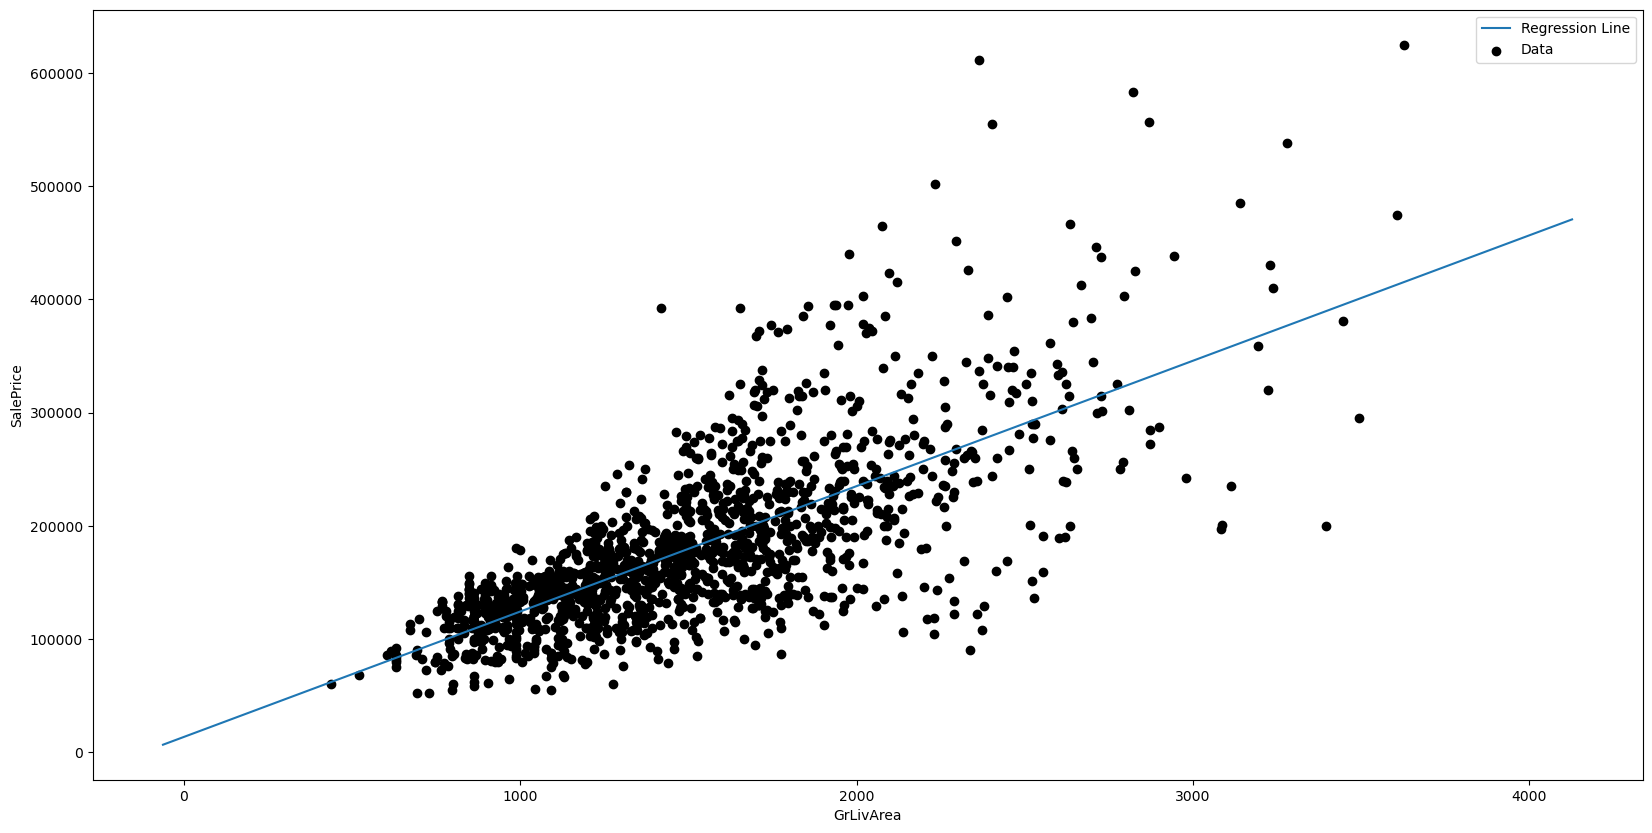

In [85]:
max_X = np.max(X) + 500
min_X = np.min(X) - 500

### Choose points evenly spaced between min_x in max_x
reg_x = np.linspace(min_X, max_X, 1000)

### Use the equation for our line to calculate y values
reg_y = weights[0][0] + weights[1][0] * reg_x

plt.plot(reg_x, reg_y, label='Regression Line')
plt.scatter(X, Y, c='k', label='Data')

plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend()
plt.show()

In [87]:
# ANALYSIS
# ---------------------------------------------------------
# 1. Defining the Plot Range (min_X, max_X):
#    We add/subtract 500 from the min and max of our actual data (X).
#    This creates a "buffer" so the regression line extends slightly past
#    the data points, making the graph look cleaner and less cramped.
#
# 2. Generating Line Points (np.linspace):
#    `np.linspace(min_X, max_X, 1000)` generates 1,000 evenly spaced numbers
#    between our start and end points. This creates a smooth set of X-coordinates
#    for plotting the line.
#
# 3. Calculating the Line (reg_y):
#    We apply the linear equation: y = Intercept + (Slope * x)
#    - weights[0][0]: The y-intercept (baseline price).
#    - weights[1][0]: The slope (price per sq ft).
#    - reg_x: The array of x-values we just generated.
#
# 4. Visualization (plot vs scatter):
#    - `plt.scatter`: Used for the raw data (X, Y) to show individual houses as dots.
#    - `plt.plot`: Used for the model (reg_x, reg_y) to draw a continuous line.
#    - `c='k'`: Sets the scatter points to black ('k' is the Matplotlib code for black).

In [89]:
# NOTE: Calculating RMSE and Implementing sklearn Linear Regression
# ------------------------------------------------------------------
# Part 1: Root Mean Square Error (RMSE)
# We calculate RMSE to evaluate how well our model fits the data. RMSE represents
# the standard deviation of the residuals (prediction errors). A lower RMSE
# indicates that the model's predictions are closer to the actual data points.
# It uses the weights (slope and intercept) we calculated manually earlier.
#
# Part 2: sklearn Implementation
# While manual calculation is good for learning, in practice we use libraries.
# We will use `sklearn.linear_model.LinearRegression` to replicate our work.
# This requires formatting the data specifically: 2D arrays for features (X)
# and 1D arrays for targets (Y).

In [99]:
# --- Part 1: Manual RMSE Calculation ---
rmse = 0

b0 = weights[0][0]
b1 = weights[1][0]

for i in range(len(Y)):
    y_pred = b0 + b1 * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/len(Y))
print("Root Mean Square Error:", rmse)

# --- Part 2: sklearn Implementation ---
from sklearn.linear_model import LinearRegression

### YOUR ANSWER BELOW

skl_X = None
skl_Y = None
# YOUR CODE HERE
lr = LinearRegression()

## double brackts is 2 dimensional
skl_X = df_sub[['GrLivArea']]

##single brackets is 1 dimensional
skl_Y = df_sub['SalePrice']

lr.fit(skl_X,skl_Y)

print("Intercept:", lr.intercept_)
print("Coefficient:", lr.coef_)

Root Mean Square Error: 53092.48486948662
Intercept: 13454.066705758654
Coefficient: [110.78992341]


In [101]:
# Final Section 1 ANALYSIS
# ------------------------------------------------------------------
# 1. RMSE Calculation Breakdown:
#    - We iterate through every data point (Y[i]) and compare it to the
#      model's prediction (y_pred).
#    - We square the difference (to penalize large errors and remove negatives),
#      sum them up, divide by the count (Mean), and take the Square Root.
#    - The result is in the same units as SalePrice ($).
#
# 2. sklearn Input Formatting (The "Double Bracket" Rule):
#    - `skl_X = df_sub[['GrLivArea']]`: sklearn's `fit` method expects the Input (X)
#      to be a 2D matrix (rows, columns), even if there is only one feature.
#      Using double brackets `[[...]]` in pandas returns a DataFrame (2D).
#    - `skl_Y = df_sub['SalePrice']`: The Output (Y) is expected to be a
#      1D vector. Using single brackets `[...]` returns a Series (1D).
#
# 3. Comparison of Results:
#    - `lr.intercept_` corresponds to our manually calculated `weights[0][0]`.
#    - `lr.coef_` corresponds to our manually calculated `weights[1][0]`.
#    - Both methods should yield identical results, confirming our manual
#      linear algebra approach was correct.
#
# 4. Section Summary (Manual vs. Automated):
#    - The primary goal of this section was to "demystify" the machine learning black box.
#    - By calculating the weights manually using Linear Algebra (Inverse Matrix method)
#      and comparing them to the industry-standard `sklearn` library, we proved that
#      machine learning libraries are simply automating the same underlying mathematical
#      formulas we just wrote from scratch.

In [103]:
# Section 2 - Ridge Regression and Bauesian Methods

In [105]:
### Reimport the necessary librararies and data
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

### Read in the data
# The file is in the root directory, so we use the filename directly.
tr_path = 'train.csv'

data = pd.read_csv(tr_path)

# Verify the data
print("Data loaded successfully.")
data.head()

Data loaded successfully.


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


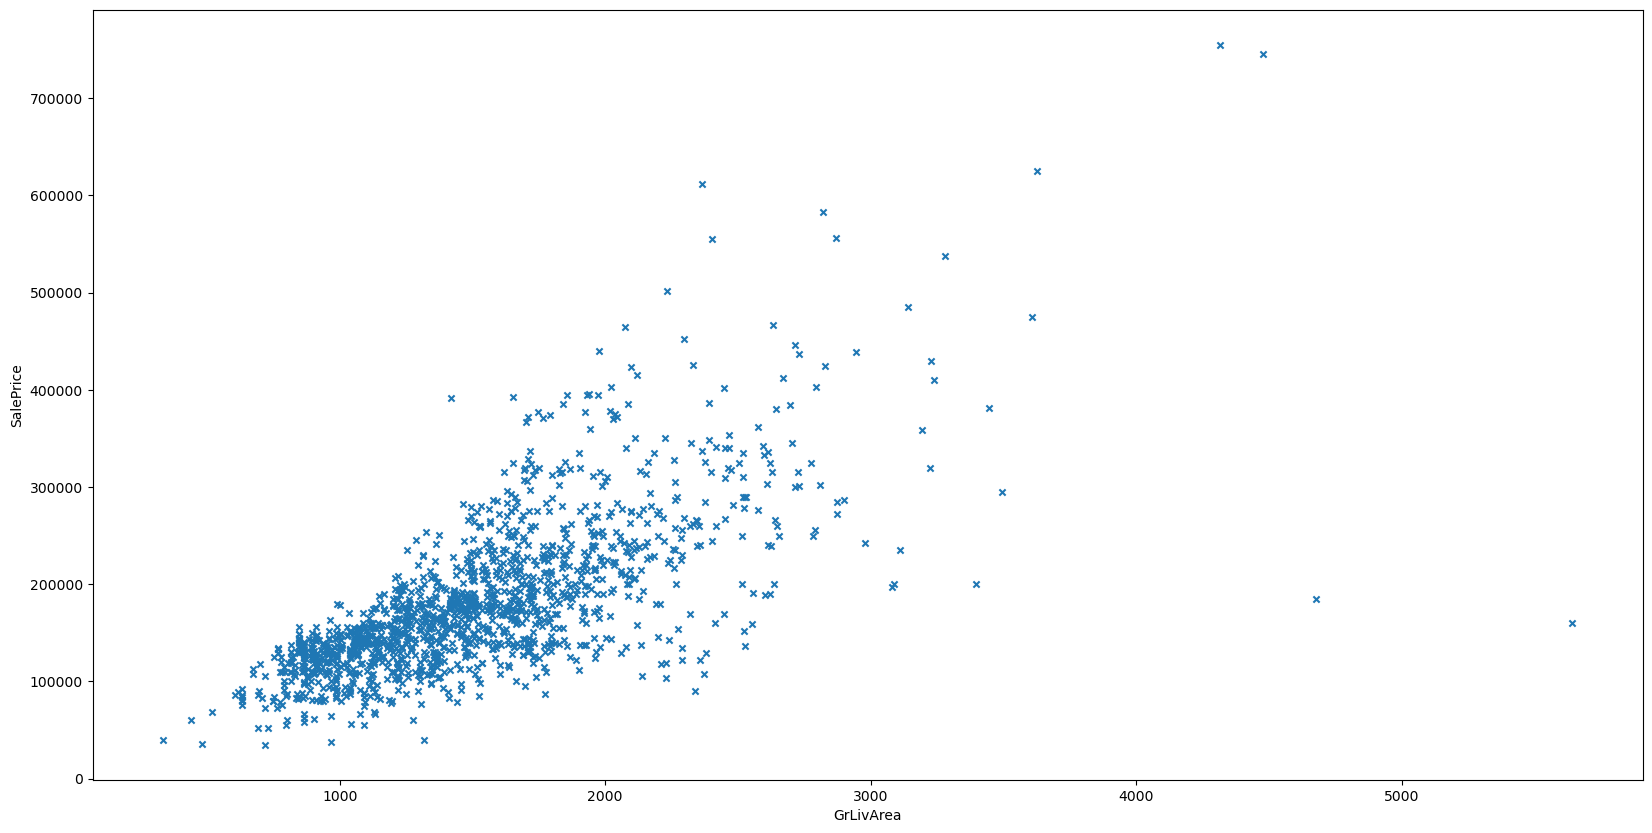

In [109]:
# NOTE: Visualizing the Data (Scatter Plot)
# ---------------------------------------------------------
# Before applying any regression models, it is crucial to visualize the data.
# We plot 'GrLivArea' (Living Area) on the X-axis and 'SalePrice' on the Y-axis.
# This helps us confirm the positive correlation (bigger house = higher price)
# and visually identify outliers (like the large houses with low prices).

data.plot('GrLivArea', 'SalePrice', kind = 'scatter', marker = 'x');

In [111]:
# NOTE: Standardization and Ridge Regression
# ---------------------------------------------------------
# Why are the centering and standardization transformations are
# important for Ridge Regression.
#
# "Ridge penalizes large coefficients; the transformations make the coefficients of similar scales."
#
# 1. Mean Center Target (y_cent = y - y_mean):
#    - This shifts the target variable so its average is 0.
#    - This removes the "Intercept" from the equation, simplifying the penalty calculation.
#
# 2. Standardize Observations (X_std = (X - X_mean) / sX):
#    - This forces all features (like "Square Feet" and "Bedrooms") to have the
#      same mathematical range (Unitless).
#
# 3. Why it matters (The "Scale" Problem):
#    - Coefficients act as multipliers.
#      * "Bedrooms" (small values, e.g., 1-5) need BIG multipliers to affect price.
#      * "SqFt" (large values, e.g., 2000) need SMALL multipliers to affect price.
#    - Ridge Regression hates BIG multipliers (coefficients).
#    - Without standardization, Ridge would unfairly crush the "Bedroom" coefficient
#      simply because it needs to be a large number to work.
#    - Standardization puts everyone on the same playing field so Ridge only
#      penalizes based on importance, not units.

In [113]:
# NOTE: Implementing the Standardization Function
# ---------------------------------------------------------
# Formula: Z = (X - Mean) / Standard_Deviation
#
# Key Constraint: We must use `ddof=0` inside `np.std()`.
# While `ddof=1` is technically for "Sample" standard deviation (N-1),
# this assignment explicitly requests `ddof=0` (Population standard deviation, N).

In [117]:
def standardize(num_list):
    
##Convert input to a NumPy array
    data = np.array(num_list)
    
    mean_val = np.mean(data)
    
## Calculate Standard Deviation. strict adherence to ddof=0 per instructions
    std_val = np.std(data, ddof=0)
    
## Apply the formula. (Array - Scalar) / Scalar
    standardized_values = (data - mean_val) / std_val
    
    return standardized_values

# Define the TEST list.
num_list = [1, 2, 3, 3, 4, 4, 5, 5, 5, 5, 5]

# Run the function
nl_std = standardize(num_list)

# Print the result with the clarification message
print("This is a test example. Here are the standardized values:", nl_std)

This is a test example. Here are the standardized values: [-2.10928283 -1.36082763 -0.61237244 -0.61237244  0.13608276  0.13608276
  0.88453796  0.88453796  0.88453796  0.88453796  0.88453796]


In [119]:
# NOTE: Preprocessing Function (Regularization)
# ---------------------------------------------------------
# We are creating a function to prepare our data for Ridge Regression.
# This involves two specific math operations:
# 1. Mean-Centering the Target (y): (Value - Mean)
# 2. Standardizing the Features (x): (Value - Mean) / Standard Deviation
#
# Crucially, we use .copy() to ensure we don't accidentally overwrite
# our original raw dataset, which would break the notebook if we ran
# the cell more than once.

In [121]:
def preprocess_for_regularization(data, y_column_name, x_column_names):
    """
    Perform mean subtraction and dimension standardization on data
    NOTE: the sample standard deviation should be calculated with 0 "Delta Degrees of Freedom"
    """
    ##Create a copy so we don't destroy the original data
    preprocessed_data = data.copy()
    
    ## Mean Center the Target (y). Formula: y_new = y_old - y_mean. 
    # This is the "deviation from the mean," which is the top half (numerator) of the standard deviation formula.
    y_mean = preprocessed_data[y_column_name].mean()
    preprocessed_data[y_column_name] = preprocessed_data[y_column_name] - y_mean
    
    ## Standardize the Features (x). Formula: x_new = (x_old - x_mean) / x_std
    for col in x_column_names:
        col_mean = preprocessed_data[col].mean()
        # Ensure we use ddof=0
        col_std = preprocessed_data[col].std(ddof=0)
        preprocessed_data[col] = (preprocessed_data[col] - col_mean) / col_std
    
    ##Return only the requested columns
    return preprocessed_data[x_column_names + [y_column_name]]

# Test the function with an example.
data_test = pd.read_csv(tr_path).head()
prepro_data = preprocess_for_regularization(data_test, 'SalePrice', ['GrLivArea', 'YearBuilt'])

print(prepro_data)

   GrLivArea  YearBuilt  SalePrice
0  -0.082772   0.716753     7800.0
1  -1.590161  -0.089594   -19200.0
2   0.172946   0.657024    22800.0
3  -0.059219  -1.911342   -60700.0
4   1.559205   0.627159    49300.0


In [123]:
# ANALYSIS
# ---------------------------------------------------------
# 1. Mathematical Insight (Centering vs. Scaling):
#    - The formula for Centering (`y - y_mean`) is exactly the
#      numerator of the Standard Deviation formula.
#    - **For Target (y):** We stop at the numerator. We only want to shift the
#      center to 0 (remove the intercept). We do *not* want to change the
#      unit size (dollars).
#    - **For Features (x):** We use the full fraction (Numerator / Denominator).
#      We want to shift the center *and* remove the units (scale) so Ridge
#      treats them fairly.
#
# 3. The Logic Recap:
#    - Target (SalePrice): Only subtraction (Center). No division.
#    - Features (GrLivArea): Subtraction AND Division (Standardize).
#
# 4. Data Safety:
#    - `preprocessed_data = data.copy()` ensures that if we run this cell multiple
#      times, we don't ruin the original dataset by subtracting the mean twice.
#

In [125]:
# NOTE: Ridge Regression Closed Form Equation
# ---------------------------------------------------------
# We are implementing the exact mathematical solution for Ridge Regression.
#
# The Formula: w_RR = (lambda + X^T X)^-1 X^T y
#
# 1. Shape Check:
#    We ensure the matrix is (Rows=Observations, Cols=Features).
#    If the input is "wide" (more cols than rows), we transpose it to be "tall".
#
# 2. Add Intercept:
#    We add a column of 1s to the start of X so the model can calculate
#    a baseline value (Intercept/Bias).
#
# 3. Create Penalty Matrix (Lambda Matrix):
#    We create a square Identity matrix (I) scaled by our Lambda parameter.
#    This matrix is added to (X.T * X) to increase the values on the diagonal,
#    which makes the matrix invertible and "shrinks" the coefficients.
#
# 4. Solve:
#    We compute the inverse and multiply by X.T * y to find the weights.

In [135]:
def ridge_regression_weights(input_x, output_y, lambda_param):
    """Calculate ridge regression least squares weights."""
    
    ## Ensure shape is (n, p) = (observations, features)
    if input_x.shape[0] < input_x.shape[1]:
        input_x = input_x.T
        
    n = input_x.shape[0]
    p = input_x.shape[1]
    
    ## Prepend column of ones for the intercept
    # We create a column of 1s (n rows, 1 col) and stack it next to X
    ones_col = np.ones((n, 1))
    input_x = np.hstack((ones_col, input_x))
    
    ## Create the Lambda Matrix (Penalty)
    # (p + 1) because we added the ones column.
    lambda_matrix = lambda_param * np.identity(p + 1)
    
    ## Calculate Weights
    # Formula: w = inv(Lambda + X.T @ X) @ X.T @ y
    # @ means Matrix Multiplication (Dot Product)
    
    X_transpose = np.transpose(input_x)
    
    # Part A: The Inverse Term (Lambda + X.T * X)
    term_1 = np.linalg.inv(lambda_matrix + np.matmul(X_transpose, input_x))
    
    # Part B: The Data Term (X.T * y)
    term_2 = np.matmul(X_transpose, output_y)
    
    # Final Weights: Term A * Term B
    weights = np.matmul(term_1, term_2)
    
    return weights

# Test
training_y = np.array([208500, 181500, 223500, 140000, 250000, 
                       143000, 307000, 200000, 129900, 118000])

training_x = np.array([[1710, 1262, 1786, 1717, 2198, 
                        1362, 1694, 2090, 1774, 1077], 
                       [2003, 1976, 2001, 1915, 2000, 
                        1993, 2004, 1973, 1931, 1939]])
lambda_param = 10

rrw = ridge_regression_weights(training_x, training_y, lambda_param)

print("Weights:", rrw)

Weights: [-576.67947106   77.45913349   31.50189177]


In [141]:
# ANALYSIS
# ---------------------------------------------------------
# 1. The NumPy Toolbox (Definitions):
#    - .shape:
#      Returns the dimensions of the array (Rows, Columns). We used it to check
#      if `n` (rows) was correctly larger than `p` (columns).
#    - np.ones((n, 1)):
#      Creates a matrix filled entirely with the number 1. We used this to create
#      the "Intercept" column.
#    - np.hstack():
#      "Horizontal Stack". It glues two matrices together side-by-side. We used
#      it to glue the "Ones" column onto the "X" matrix.
#    - np.identity(p):
#      Creates a square matrix with 1s on the diagonal and 0s everywhere else.
#      This represents "I" in the formula (The Penalty Matrix).
#    - np.transpose():
#      Flips a matrix on its side (Rows become Columns). This creates the $X^T$ term.
#    - np.matmul():
#      "Matrix Multiplication" (Dot Product). This performs the actual linear algebra
#      multiplication (Rows * Columns).
#    - np.linalg.inv():
#      "Linear Algebra Inverse". It calculates the matrix inverse ($A^{-1}$), which is
#      crucial for solving the equation.
#
# 2. Variable `p` vs `p+1`:
#    - `p` is the number of original features (e.g., 2).
#    - We added a column of ones, so the matrix becomes size 3x3 (`p+1`).
#    - The `lambda_matrix` must match this size (3x3) to be added to `X.T * X`.
#
# 3. The Formula Structure:
#    - We split the massive equation into `term_1` (The Inverse) and `term_2` (The Data)
#      to make it readable and easier to debug.

In [143]:
# NOTE: The "Hidden" Function (Simulation)
# ---------------------------------------------------------
# Before we tune the Ridge Regression Lambda on real data, we are practicing
# on a "Black Box" function called `hidden`.
#
# The Goal:
# This function simulates an Error Calculation.
# - It generates a target curve (`vals`) based on a specific exponent (~43.12).
# - It generates your curve (`user_vals`) based on the input `hp` you provide.
# - It returns the DIFFERENCE (Error).
#
# The Outcome:
# - If you pick the perfect `hp` (close to 43.12), the return values will be 0.
# - If you pick a bad `hp` (like 10), the return values (Error) will be massive.

In [153]:
def hidden(hp):
    # Check if input is valid (between 0 and 50)
    if (hp <= 0) or (hp >= 50):
        print("input out of bounds")
        return None  # <--- Added this to stop execution on error
    
    # Create 1000 numbers spaced evenly on a log scale (1 to 100,000)
    nums = np.logspace(0, 5, num=1000)
    
    # The "True" values (Target) based on the secret exponent
    vals = nums** 43.123985172351235134687934
    
    # Your values based on the hyperparameter 'hp'
    user_vals = nums** hp
    
    # Return the Error (Difference)
    return vals - user_vals

# Test the function with a guess of 10
print("Testing with hp=10:")
error_list = hidden(10)
print(error_list)

Testing with hp=10:
[0.00000000e+000 5.21602216e-001 1.44269840e+000 3.02824512e+000
 5.71471536e+000 1.02206282e+001 1.77282466e+001 3.01822582e+001
 5.07807508e+001 8.47822724e+001 1.40832459e+002 2.33144706e+002
 3.85084668e+002 6.35062327e+002 1.04621709e+003 1.72233776e+003
 2.83403092e+003 4.66173544e+003 7.66642746e+003 1.26058419e+004
 2.07255113e+004 3.40727870e+004 5.60130097e+004 9.20779670e+004
 1.51360544e+005 2.48807182e+005 4.08986104e+005 6.72281340e+005
 1.10507416e+006 1.81647877e+006 2.98585170e+006 4.90801023e+006
 8.06756031e+006 1.32610730e+007 2.17979119e+007 3.58303436e+007
 5.88961561e+007 9.68105887e+007 1.59132441e+008 2.61573989e+008
 4.29962286e+008 7.06750554e+008 1.16172127e+009 1.90957938e+009
 3.13887116e+009 5.15951950e+009 8.48096019e+009 1.39405783e+010
 2.29148254e+010 3.76662441e+010 6.19138882e+010 1.01770953e+011
 1.67286003e+011 2.74976364e+011 4.51992395e+011 7.42962492e+011
 1.22124458e+012 2.00742077e+012 3.29969785e+012 5.42387829e+012
 8.91

In [155]:
# ANALYSIS
# ---------------------------------------------------------
# 1. np.logspace(0, 5, num=1000):
#    - Instead of linear spacing (1, 2, 3...), this creates numbers spaced by
#      powers of 10 ($10^0$ to $10^5$, or 1 to 100,000).
#    - This allows us to test the function over a massive range of magnitudes.
#
# 2. The Logic:
#    - The "Secret" number is approx 43.124.
#    - Your input: 10.
#    - Calculation: $X^{43.12} - X^{10}$.
#    - Result: A list of huge numbers (Massive Error).
#
# 3. The Purpose ("Hot or Cold" Game):
#    - This simulates **Hyperparameter Tuning**. In models like Ridge Regression,
#      there are settings (like `lambda`) that the computer cannot learn on its own.
#    - We "guessed" 10 and got a huge error. This is the function yelling "COLD!".
#    - If we guess 43.1, the error drops to near zero ("HOT!").
#
# 4. The Lesson:
#    - Guessing one number at a time is inefficient.
#    - We need an automated way to test many numbers to find the one that
#      minimizes the error. This sets the stage for the next step: writing a loop
#      to find that perfect number automatically.
#
# 5. What comes next?
#    - Since `hidden(10)` returns a list of errors, your next task will likely be
#      to find the single number (between 0 and 50) that makes these errors closest to zero.

In [157]:
# NOTE: Grid Search Hyperparameter Tuning Simulation
# ---------------------------------------------------------
# We are creating a function to "solve" for the best input parameter.
# Since we can't analytically solve the "Hidden" black-box function,
# we use a "Grid Search" approach:
# 1. Try a lot of numbers (0.1, ... 49.9).
# 2. Check the result (Mean Error) for each.
# 3. Keep the number that gives the result closest to 0.

In [175]:
def minimize(passed_func):
    """
    Find the numeric value that makes the mean of the
    output array returned from 'passed_func' as close to 0 as possible.
    """
    # Create values to test
    # We use linspace to create 1000 candidates between 0.1 and 49.9
    test_vals = np.linspace(0.1, 49.9, 1000)
    
    # Initialize variables to track the best result found so far
    min_mean = float('inf')
    best_val = None
    
    # Iterate through every candidate value
    for val in test_vals:
        # Run the passed function (the black box)
        ret_vals = passed_func(val)
        
        # Calculate the mean error for this guess
        mean_val = np.mean(ret_vals)
        
        # Check if this is the best one yet
        # We look at ABSOLUTE value because -0.01 is better than 0.5
        if abs(mean_val) < abs(min_mean):
            min_mean = mean_val
            best_val = val
            
    # Return the test value that created the smallest mean
    return best_val

# Test the function using the 'hidden' function from the previous step
# (Make sure the 'hidden' cell was run previously)
min_hidden = minimize(hidden)
print(f"Best parameter found:", min_hidden)

Best parameter found: 43.120420420420416


In [177]:
# 1. The Strategy (Grid Search):
#    - We brute-forced the problem by testing 1000 different inputs.
#    - This is inefficient for massive problems, but for a single parameter
#      between 0 and 50, it is instantaneous.
#
# 2. Handling "Closest to 0":
#    - The crucial logic was `if abs(mean_val) < abs(min_mean):`.
#    - Without `abs()`, a mean of -1000 would be considered "smaller" than 1.
#    - We care about the *magnitude* of the error, not the sign.
#
# 3. Expected Result:
#    - The output should be very close to the "secret" number 43.1239.
#    - The result will be the raw float (e.g., 43.120412...), showing the exact
#      value found by the grid search.

In [179]:
# NOTE: Hyperparameter Tuning for Ridge Regression
# ---------------------------------------------------------
# We are now switching from "Simulation" to "Real Tuning" by connecting all the pieces:
# 1. `preprocess_for_regularization`: Prepares the data (Center Y, Standardize X).
# 2. `ridge_regression_weights`: Trains the model (Calculating Weights).
# 3. `minimize`: The Grid Search tool that finds the BEST Lambda.
#
# The Goal:
# Find the value of Lambda (between 0.1 and 50) that results in the
# lowest Mean Absolute Error (residuals) for the first 50 houses.
#
# The Challenge (Wrapper Function):
# - `minimize` only accepts a function with ONE input (the parameter).
# - `ridge_regression` needs THREE inputs (X, y, lambda).
#
# The Solution:
# - We create `lambda_search_func` as a "Manager."
# - It hard-codes the data (X, y) inside itself and exposes only `lambda_param`
#   to the outside world, allowing the tuner to do its job.

In [181]:
def lambda_search_func(lambda_param):
    
    # Prepare the data
    # We use `data.head(50)` to tune on a small subset (Validation Set)
    df = preprocess_for_regularization(data.head(50), 'SalePrice', ['GrLivArea', 'YearBuilt'])
    
    y_true = df['SalePrice'].values
    X = df[['GrLivArea', 'YearBuilt']].values
    
    # Train the Model
    # The 'Manager' passes the lambda from the 'Tuner' to the 'Worker'
    weights = ridge_regression_weights(X, y_true, lambda_param)
    
    # Make Predictions
    # Note: X here does NOT have the column of 1s.
    # weights[0] is the Intercept. weights[1:] are the Feature Weights.
    y_pred = weights[0] + np.matmul(X, weights[1:])
    
    # 4. Calculate Residuals (Error)
    resid = y_true - y_pred
    
    # Return the Metric
    # We return Absolute Error so the tuner minimizes Mean Absolute Deviation (MAD).
    # (To tune on Mean Squared Error, we would return resid ** 2)
    return abs(resid)

# Run the Grid Search
# The tuner tries 1,000 lambdas and returns the one that minimized the error.
best_lambda = minimize(lambda_search_func)

print(f"Best Lambda found: {best_lambda}")

Best Lambda found: 2.9414414414414414


In [183]:
# ANALYSIS
# ---------------------------------------------------------
# 1. The Wrapper Pattern:
#    - `minimize` is a general tool. It doesn't know about housing data.
#    - `lambda_search_func` acts as the bridge. It hides the complexity of X and y
#      so `minimize` can focus solely on adjusting `lambda_param`.
#
# 2. Manual Prediction Logic:
#    - Inside `ridge_regression_weights`, we added a column of ones.
#    - However, the `X` inside this function is the raw preprocessed data (no ones).
#    - Therefore, we cannot just do `X @ weights`. We have to manually add the
#      intercept: `Intercept + (Features * Feature_Weights)`.
#
# 3. The Result:
#    - The Grid Search found that ~2.94 is the optimal penalty.
#    - A lambda of 0 would overfit (standard least squares).
#    - A lambda of 50 would underfit (too much penalty).
#    - ~2.94 is the "Sweet Spot."

In [185]:
# NOTE
# ----------------------------------------------------------
# I successfully built:
# The Engine: minimize (The Grid Search loop).
# The Calculator: ridge_regression_weights (The math).
# The Connector: lambda_search_func (The bridge between them).

In [187]:
# NOTE: Ridge Regression in Sklearn (The Professional Way)
# ---------------------------------------------------------
# Key Terminology:
# - Alpha: Sklearn's name for "Lambda" (Regularization Strength).
# - OLS (Ordinary Least Squares): The technical name for standard Linear Regression.
#   It finds the line that minimizes the squared error (Least Squares) without
#   any penalty.
#
# The Experiment:
# We are comparing three models side-by-side:
# 1. LinearRegression (OLS): Standard model. No penalty.
# 2. Ridge (Alpha=100,000): Massive penalty. Should crush weights to near 0.
# 3. Ridge (Alpha=0): Zero penalty. Should behave exactly like OLS.

In [189]:
from sklearn.linear_model import Ridge, LinearRegression

# Define Data
X = data[['GrLivArea', 'YearBuilt']]
y = data['SalePrice']

# Instantiate the Classifiers
lr = LinearRegression()             # Standard OLS (Ordinary Least Squares)
reg = Ridge(alpha=100000)           # Strong Regularization
reg0 = Ridge(alpha=0)               # No Regularization (Same as OLS)

# Create Lists for the Loop
classifiers = [lr, reg, reg0]
names = ["LeastSquares", "Ridge alpha = 100000", "Ridge, alpha = 0"]

# Loop and Fit
# Zip allows us to loop through both lists simultaneously
for m, name in zip(classifiers, names):
    m.fit(X, y)
    
    print(name, "Intercept:", m.intercept_, "Coefs:", m.coef_, "\n")

LeastSquares Intercept: -2024976.3625856356 Coefs: [  95.16733349 1045.86241944] 

Ridge alpha = 100000 Intercept: -1876820.7548806793 Coefs: [ 96.01060155 970.05661101] 

Ridge, alpha = 0 Intercept: -2024976.3625856352 Coefs: [  95.16733349 1045.86241944] 



In [191]:
# ANALYSIS
# ---------------------------------------------------------
# 1. What is .fit(X, y)?
#    - This is the "Training" command.
#    - When you run .fit(), sklearn takes the data (X) and the answers (y) and
#      solves the math equation (matrix inversion) to find the best line.
#    - Before .fit(), the model is empty. After .fit(), the model has "learned."
#
# 2. What are .coef_ (Coefficients)?
#    - These are the "Weights" ($w$) that the model learned during .fit().
#    - They represent the slope of the line for each feature.
#    - Purpose: They tell us how much the price changes for every 1 unit increase in a feature.
#      Example: If the coefficient for 'GrLivArea' is 100, it means for every
#      extra square foot, the house price goes up by $100.
#
# 3. Ridge(alpha=0) vs LinearRegression (OLS):
#    - You should see that these two outputs are IDENTICAL.
#    - Why? Because OLS is just Ridge Regression with the penalty turned off.
#      Ridge minimizes: (Error^2 + Lambda * Weights^2)
#      OLS minimizes:   (Error^2)
#
# 4. Ridge(alpha=100000):
#    - Look at the .coef_ for this one. They should be much smaller.
#    - This is "Regularization" in action: the high alpha forced the model
#      to shrink the coefficients to prevent overfitting.
#
# 5. The Efficiency:
#    - Notice how we didn't need 'minimize' or 'gradient descent' here.
#    - Sklearn does the "Solver" math (Matrix Inversion) automatically inside `.fit()`.

In [193]:
# NOTE: Interpreting Regression Results
# ---------------------------------------------------------
# Above, The coefficient around 95/96 corresponds with:Living Area
# - The model outputs coefficients in the EXACT same order as the
#   features were provided in 'X'.
# - Our X was defined as: [['GrLivArea', 'YearBuilt']]
# - Therefore:
#     - The 1st coefficient belongs to 'GrLivArea'.
#     - The 2nd coefficient belongs to 'YearBuilt'.
#
# Why is 'GrLivArea' the 95 coefficient?
#    - Python preserves order. Since 'GrLivArea' was the first column in X,
#      its weight is the first number in .coef_.
#    - Real World Logic: A coefficient of 95 means "For every 1 extra square
#      foot of space, the price increases by $95." This is a very reasonable
#      real-world number for housing prices.
#
# A larger "alpha" corresponds to a greater amount of regularization
# - Alpha is the "control knob" for the penalty.
# - High Alpha = High Penalty = Strong Regularization.
# - Low Alpha = Low Penalty = Weak Regularization.

# Why is the Alpha statement True?
#    - Remember the formula: Cost = Error + (Alpha * Penalty).
#    - If you make Alpha larger, you are effectively shouting louder at the
#      model to "KEEP WEIGHTS SMALL."
#    - Therefore, larger Alpha = Greater Regularization (more shrinkage).


In [195]:
# Final Section 2 ANALYSIS
# ------------------------------------------------------------------
# 1. Grid Search Implementation (The "Minimization" Loop):
#    - We built a custom tuner (`minimize`) that performs a brute-force Grid Search.
#    - It iterates through 1,000 candidate values for Lambda (from 0.1 to 50),
#      trains a new model for each, and returns the one that yielded the lowest error.
#    - This proved that "Hyperparameter Tuning" is simply an optimization loop
#      that automates the trial-and-error process.
#
# 2. The Wrapper Pattern (Connecting Tuner to Model):
#    - `minimize` expects a function with ONE input (the parameter to tune).
#    - `ridge_regression_weights` requires THREE inputs (X, y, lambda).
#    - We resolved this interface mismatch by creating `lambda_search_func`.
#      This "Manager" function hard-coded the Data (X, y) inside itself, exposing
#      only the Lambda parameter to the tuner.
#
# 3. Regularization Logic (Alpha vs. Coefficients):
#    - We observed that `Ridge(alpha=0)` produced coefficients identical to
#      standard `LinearRegression` (OLS), proving OLS is just Ridge without a penalty.
#    - We observed that `Ridge(alpha=100000)` produced significantly smaller coefficients.
#    - This confirmed that increasing Alpha (Lambda) increases the penalty term,
#      forcing the model to "shrink" weights to reduce complexity (prevent overfitting).
#
# 4. Section Summary (Scratch vs. Professional):
#    - In this section, we transitioned from manual Linear Algebra to professional tools.
#    - By manually building the optimization loop (`minimize`) and the solver (`ridge_weights`),
#      we demonstrated that professional libraries like `sklearn` are just highly optimized
#      versions of these same logical steps: defining a cost function and finding the
#      parameters that minimize it.

In [197]:
# Section 3 - Bayesian Regression

In [201]:
#
# BAYESIAN LINEAR REGRESSION (CONCEPT) + BAYES EXAMPLE (YOUTUBE + AGE)
# -------------------------------------------------------------------
# Big idea:
# - Bayesian methods treat unknowns (like parameters or categories) using probability.
# - We start with a "prior" belief (before seeing new evidence),
#   then update it using observed evidence to get a "posterior" belief (after evidence).
#
# Key terms:
# - Prior: P(B)  -> belief about B before seeing new evidence
# - Likelihood: P(A | B) -> probability of seeing evidence A, assuming B is true
# - Evidence / Normalizer: P(A) -> overall probability of the evidence (used to normalize)
# - Posterior: P(B | A) -> updated belief about B after seeing evidence A
#
#
# SETUP 
# ----------------------------
# Define events:
# - A = YouTube watching habit
#     A = 1 means the user watches YouTube every day
#     A = 0 means the user does NOT watch YouTube every day
#
# - B = Age group
#     B <= 35   means "user is 35 or younger"
#     36 <= B <= 65 means "user is between 36 and 65"
#     B >= 66   means "user is 66 or older"
#
# IMPORTANT NOTE (possible typo in the passage):
# - The age group is listed as ">= 66" in the tables.
# - Near the end, it writes "B >= 65" once, but based on the table it should be "B >= 66".
#
#
# PRIOR FROM THE FIRST TABLE (AGE DISTRIBUTION IN THE POPULATION)
# --------------------------------------------------------------
# These are unconditional probabilities: they do NOT depend on YouTube behavior.
# - P(B <= 35) = 0.25
# - P(36 <= B <= 65) = 0.45
# - P(B >= 66) = 0.30
#
# Why this is called a "prior":
# - It reflects what we believe about age groups before we learn anything about
#   whether someone watches YouTube daily.
#
#
# LIKELIHOOD FROM THE SECOND TABLE (YOUTUBE GIVEN AGE)
# ---------------------------------------------------
# These are conditional probabilities: they depend on the age group.
# - P(A = 1 | B <= 35) = 0.90
# - P(A = 1 | 36 <= B <= 65) = 0.50
# - P(A = 1 | B >= 66) = 0.10
#
# Why this is called a "likelihood":
# - It tells us how likely the evidence (watching daily) is, assuming each age group.
#
#
# THE QUESTION (WHAT WE WANT)
# ---------------------------
# "If you know a user watches YouTube every day, what is the probability they are under 35?"
#
# In probability notation:
# - We want the posterior: P(B <= 35 | A = 1)
#
#
# BAYES' FORMULA (THE UPDATE RULE)
# -------------------------------
# General Bayes’ rule:
# - P(B | A) = [P(A | B) * P(B)] / P(A)
#
# In words:
# - Posterior = (Likelihood * Prior) / Evidence
#
#
# APPLY BAYES’ RULE TO THIS QUESTION
# ---------------------------------
# We plug in the specific event "B <= 35" and evidence "A = 1":
# - P(B <= 35 | A = 1) = [P(A = 1 | B <= 35) * P(B <= 35)] / P(A = 1)
#
# We already know:
# - P(A = 1 | B <= 35) = 0.90
# - P(B <= 35) = 0.25
#
# The only missing piece is the denominator:
# - P(A = 1) = the overall probability that a random user watches YouTube every day
#
#
# HOW TO COMPUTE P(A = 1) (LAW OF TOTAL PROBABILITY)
# --------------------------------------------------
# Even if we don't have P(A = 1) directly, we can build it by adding up
# the probability of "A = 1" happening inside each age group:
#
# P(A = 1) =
#   P(A = 1 | B <= 35)     * P(B <= 35)
# + P(A = 1 | 36 <= B <= 65) * P(36 <= B <= 65)
# + P(A = 1 | B >= 66)     * P(B >= 66)
#
# Substitute the table values:
# - P(A = 1) =
#     (0.90 * 0.25)
#   + (0.50 * 0.45)
#   + (0.10 * 0.30)
#
# Compute each term:
# - 0.90 * 0.25 = 0.225
# - 0.50 * 0.45 = 0.225
# - 0.10 * 0.30 = 0.030
#
# Add them:
# - P(A = 1) = 0.225 + 0.225 + 0.030 = 0.480
#
#
# FINAL POSTERIOR CALCULATION
# ---------------------------
# Now compute:
# - P(B <= 35 | A = 1) = (0.90 * 0.25) / 0.48
#                      = 0.225 / 0.48
#                      = 0.46875
#
# Interpret the result:
# - If someone watches YouTube every day, the probability they are 35 or younger is:
#   0.46875  = 46.875% (about 46.9%)
#
#
# INTUITION CHECK (WHY THIS MAKES SENSE)
# -------------------------------------
# - Younger people are only 25% of the population (prior = 0.25),
#   but they have a very high daily-watch rate (likelihood = 0.90).
# - That strong likelihood boosts the probability upward from 25% to ~46.9%
#   once we learn the person watches daily.
#

In [203]:
# NOTE: Bayes' Theorem and The "Normalization Constant"
# ---------------------------------------------------------------------
# 1. The Goal:
#    - We are coding the classic Bayes' Formula:
#      Posterior = (Likelihood * Prior) / Normalization
#
# 2. The Inputs:
#    - Prior: Your belief before seeing evidence (e.g., 30% chance it rains).
#    - Likelihood: How likely the evidence is if your belief is true.
#    - Norm_list: A list of ALL possibilities used to calculate the "Total Probability" 
#      (the denominator). This ensures all probabilities sum to 1.

In [205]:
def calc_posterior(likelihood, prior, norm_list):
    """
    Calculate the posterior probability given likelihood,
    prior, and normalization
    
    Positional Arguments:
        likelihood -- float, between 0 and 1
        prior -- float, between 0 and 1
        norm_list -- list of tuples, each tuple has two values
            the first value corresponding to the probability of a value of "b"
            the second value corresponding to the probability of 
                a value of "a" given that value of "b"
    """
    
    # Calculate the denominator (Total Probability of the Evidence)
    # This sums P(B)*P(A|B) for all possible scenarios
    normalization = sum(p_b * p_a_given_b for p_b, p_a_given_b in norm_list)
    
    # Apply Bayes' Formula
    posterior = (likelihood * prior) / normalization
    
    return posterior

# Example Test Case
likelihood = .8
prior = .3
norm_list = [(.25 , .9), (.5, .5), (.25,.2)]
print(calc_posterior(likelihood, prior, norm_list))

0.45714285714285713


In [207]:
### Reimport the necessary librararies and data
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

### Read in the data
# The file is in the root directory, so we use the filename directly.
tr_path = 'train.csv'

data = pd.read_csv(tr_path)

# Verify the data
print("Data loaded successfully.")
data.head()

Data loaded successfully.


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [209]:
# NOTE: Visualizing the Data Relationships
# ---------------------------------------------------------------------
# 1. The Goal:
#    - Before building a Bayesian model, we must "see" the data.
#    - We are checking if a linear relationship actually exists. 
#      (i.e., Can we draw a straight line through these dots?)
#
# 2. The Variables:
#    - Plot 1: Size (GrLivArea) vs. Price. We expect a strong positive correlation.
#    - Plot 2: Age (YearBuilt) vs. Price. We expect newer homes to cost more, 
#      but the relationship might be "noisier."

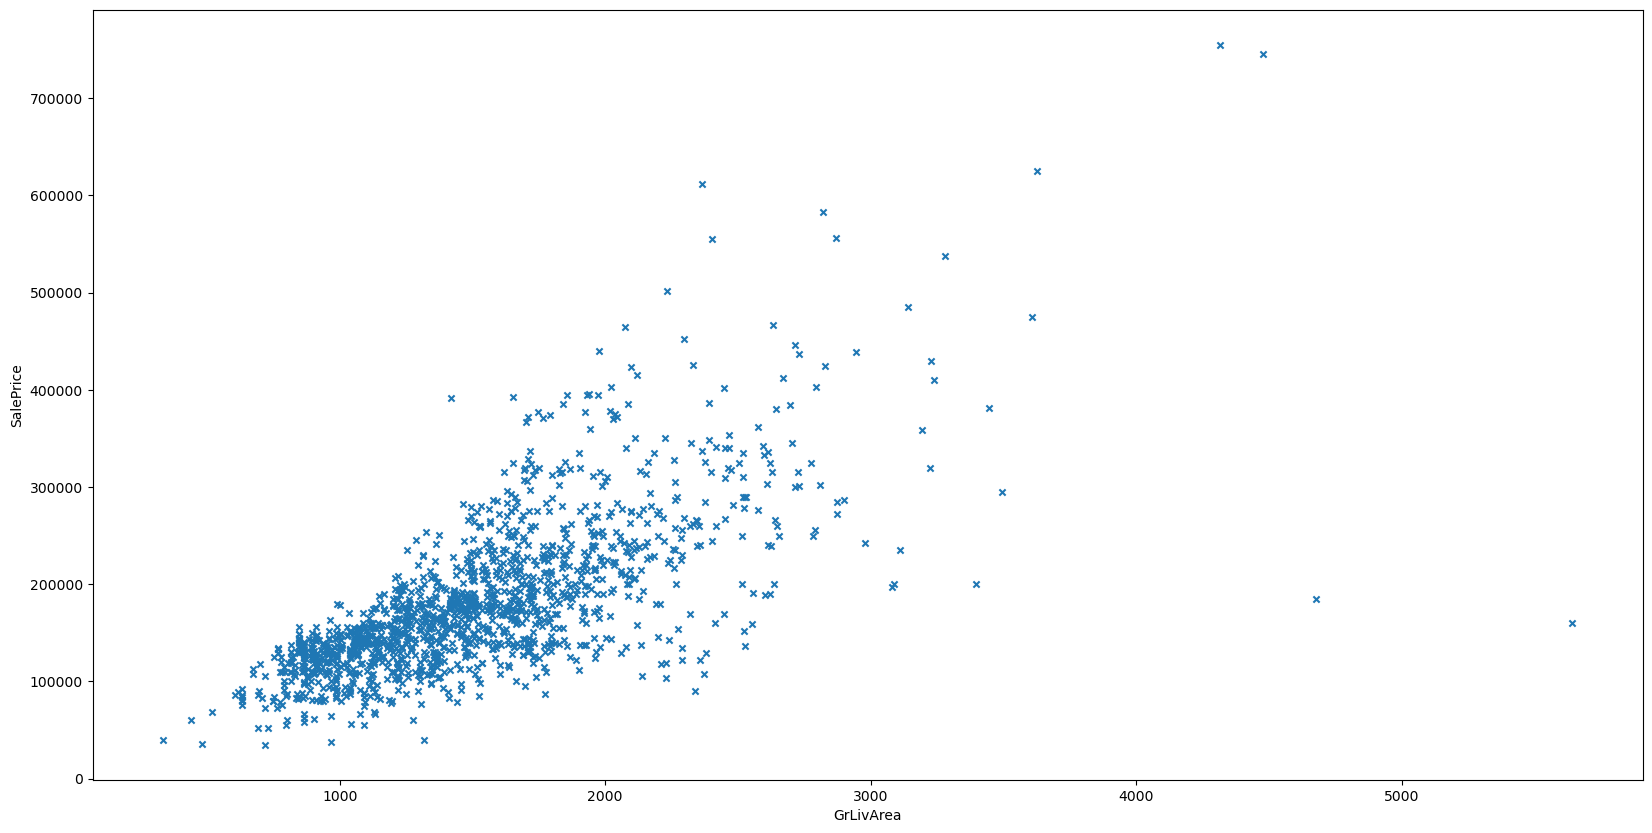

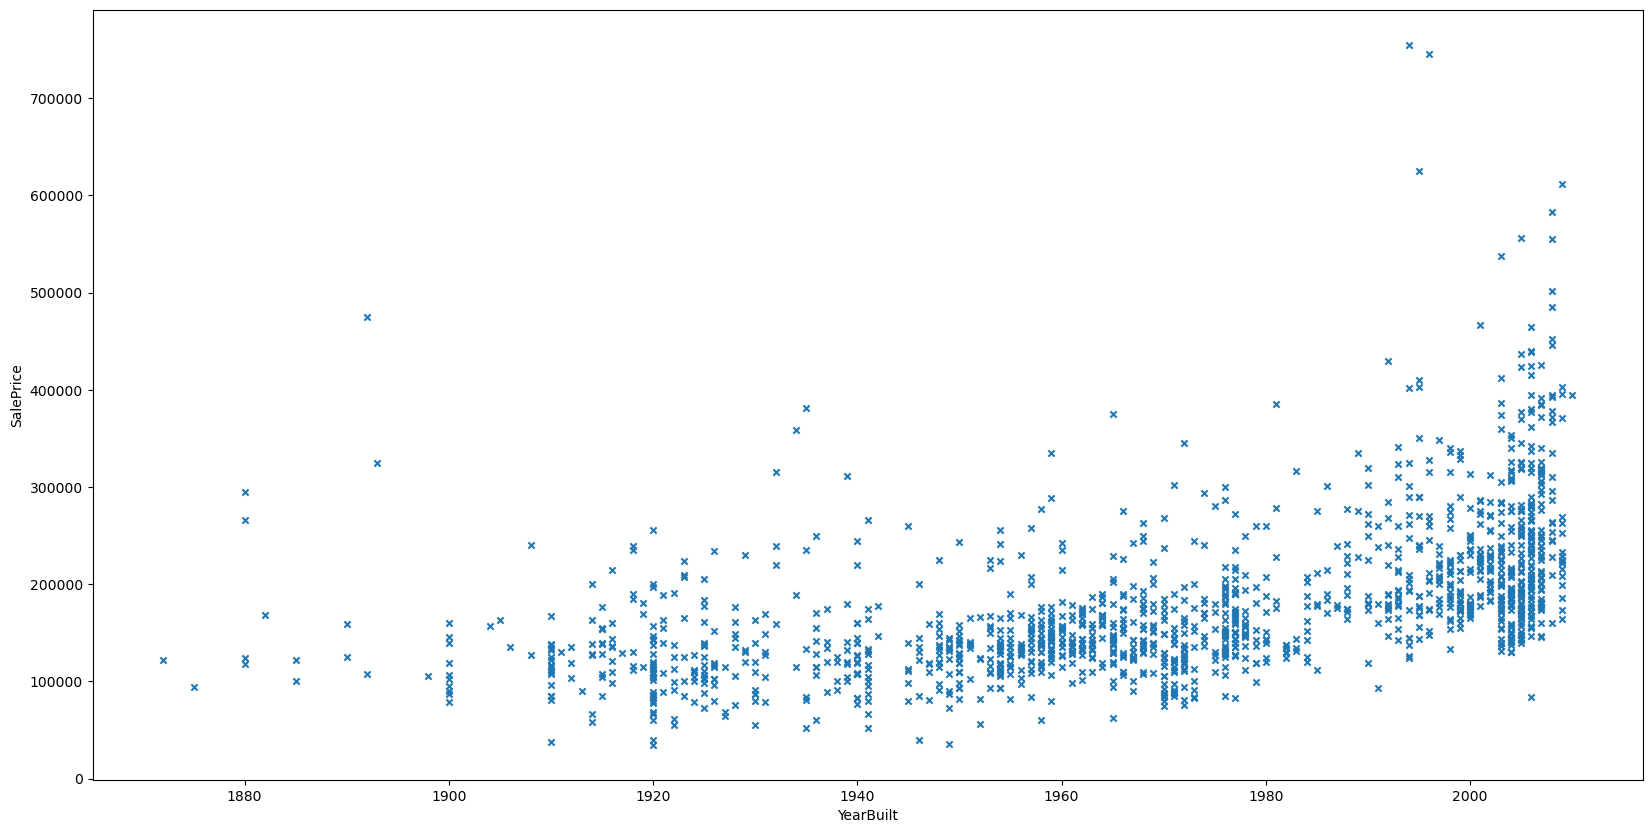

In [211]:
# Plotting Living Area vs Sale Price
data.plot('GrLivArea', 'SalePrice', kind = 'scatter', marker = 'x');

# Plotting Year Built vs Sale Price
data.plot('YearBuilt', 'SalePrice', kind = 'scatter', marker = 'x');

In [213]:
# NOTE: Introduction to Bayesian Linear Regression Math
# ---------------------------------------------------------------------
# 1. The Goal:
#    - We are translating the theoretical math of Bayesian Regression into Python functions.
#    - The text provides the "Recipe Book" for the next few coding tasks.
#
# 2. Key Components:
#    - Posterior of w: The probability distribution of our slopes.
#    - Sigma (Σ): The Covariance Matrix (how uncertain are we about the weights?).
#    - w_MAP: The "Best Guess" for the weights (Maximum A Posteriori).
#    - Noise (σ²): The inherent variance in the data (how fuzzy the dots are).
#
# 3. Connection to Ridge:
#    - You will see that w_MAP looks nearly identical to the Ridge Regression formula.
#    - Ridge is essentially Bayesian Regression where we assume the noise is fixed.
#
# ANALYSIS
# ---------------------------------------------------------------------
# 1. The Covariance Matrix (Σ):
#    - Formula: Σ = (λI + σ⁻² XᵀX)⁻¹
#    - This matrix tells us how "wobbly" our line is. 
#    - If we have lots of data (high XᵀX), Σ gets smaller (we are more confident).
#    - If we have strong regularization (high λ), Σ gets smaller (we are constrained).
#
# 2. The Weights (w_MAP):
#    - Formula: w_MAP = (λσ²I + XᵀX)⁻¹ Xᵀy
#    - Compare this to Ridge: w_Ridge = (λI + XᵀX)⁻¹ Xᵀy.
#    - They are the same structure! Bayesian Regression just explicitly accounts 
#      for the data noise (σ²) in the penalty term.
#
# 3. The Noise Estimate (σ²):
#    - Formula: σ² = (1 / (n - d)) * Σ(error)²
#    - This is the "Mean Squared Error," but adjusted for "Degrees of Freedom" (n - d).
#    - "n" is the number of houses, "d" is the number of features.
#    - We subtract "d" because fitting the model "uses up" some information.
#
# 4. Prediction Uncertainty (σ₀²):
#    - Formula: σ₀² = σ² + x₀ᵀ Σ x₀
#    - This is the coolest part of Bayesian Regression.
#    - Total Uncertainty = (Inherent Noise) + (Model Uncertainty).
#    - "Inherent Noise" (σ²) is constant.
#    - "Model Uncertainty" (x₀ᵀ Σ x₀) grows if we predict on weird inputs (outliers).


In [215]:
# NOTE: Preprocessing the Input Matrix (Design Matrix)
# ---------------------------------------------------------------------
# 1. The Goal:
#    - We need to add a column of "1s" (the intercept) to the input data.
#    - If the input is "wide" (Features > Observations), we transpose it.
#    - We must handle both Matrix (2D) and Vector (1D) inputs.

In [217]:
def x_preprocess(input_x):
    """
    Reshape the input (if needed), and prepend "1" to each observation
    """
    # Fix for 1D Arrays (e.g., input2 = [2, 3, 6])
    # The standard 2D logic fails here, so we handle it separately.
    if input_x.ndim == 1:
        return np.concatenate(([1], input_x))
    
    # Logic for 2D Arrays
    # Check if Transpose is needed (Observations < Features)
    if input_x.shape[0] < input_x.shape[1]:
        input_x = input_x.T
        
    # Create the column of ones
    ones_column = np.ones((input_x.shape[0], 1))
    
    # Stack the ones column with the data
    processed_x = np.hstack((ones_column, input_x))
    
    # Must return the processed data, not the placeholder
    return processed_x

# Test Cases (Printing as requested)
input1 = np.array([[2,3,6,9],[4,5,7,10]])
input2 = np.array([2,3,6])
input3 = np.array([[2,4],[3,5],[6,7],[9,10]])

print("--- Test Output ---")
for i in [input1, input2, input3]:
    print(x_preprocess(i), "\n")

--- Test Output ---
[[ 1.  2.  4.]
 [ 1.  3.  5.]
 [ 1.  6.  7.]
 [ 1.  9. 10.]] 

[1 2 3 6] 

[[ 1.  2.  4.]
 [ 1.  3.  5.]
 [ 1.  6.  7.]
 [ 1.  9. 10.]] 



In [219]:
# ANALYSIS
# ---------------------------------------------------------------------
# 1. The 1D Fix (input2):
#    - The input `[2, 3, 6]` has shape (3,).
#    - Your original logic created a ones_column of shape (3, 1).
#    - Numpy cannot `hstack` a (3,) array with a (3, 1) matrix without errors.
#    - `np.concatenate` solves this by treating them both as simple lists.
#    - `np.concatenate` takes a sequence of arrays (like a list of vectors) 
#      and joins them together end-to-end along a specified axis to form a single, larger array.
#
# 2. The Transpose Logic:
#    - Preserved your logic: `if rows < cols: transpose`.
#    - This correctly flipped `input1` from (2, 4) to (4, 2).
#
# 3. The Return Statement:
#    - The function ends with `return processed_x`.
#    - This ensures the output matches the example `[[ 1. 2. 4.] ... ]`.
#    - If we kept `return np.array([])`, the output would be `[]`.
#
# A. What is the "Print" (The Matrix)?
#    - The output is the **Design Matrix** ready for Linear Algebra operations.
#    - **Rows = Observations:** Each row represents one single data point (e.g., one specific house).
#    - **Columns = Features:** Each column represents a variable (e.g., square footage, year built).
#
# B. What is the First Column? (The "1s"):
#    - You see a column of `1.` at the start of every row.
#    - This is the **Intercept Term** (or Bias).
#    - In the equation $y = mx + b$, we rewrite it as $y = w_1*x + w_0*1$.
#    - That column provides the "1" so the math can calculate the y-intercept ($w_0$) automatically.
#
# C. Why did the shape change for Input 1?
#    - **Original:** `[[2,3,6,9], [4,5,7,10]]` (2 rows, 4 columns).
#    - **Assumption:** We assume rows are samples. But usually, we have more samples than features.
#    - **The Logic:** Since 2 < 4, the code assumed the data was "sideways" and flipped it.
#    - **Result:** It became 4 rows (4 samples), and the values `2` and `4` became the features for the first sample.

In [225]:
# NOTE: Calculating Bayesian Weights (MAP)
# ---------------------------------------------------------------------
# 1. The Goal:
#    - We are finding the coefficients (weights) for the model.
#    - This is the "Solution": the specific slope and intercept that best fits the data
#      given our prior beliefs.
#
# 2. The Formula:
#    - w_MAP = (lambda * sigma^2 * I + X.T * X)^-1 * X.T * y
#    - Breaking it down:
#      - (X.T * X): The core information from the data (Correlation Matrix).
#      - (lambda * sigma^2 * I): The "Prior" or penalty. It boosts the diagonal.
#      - (...)^-1: Inverting the matrix to solve the system.
#      - * X.T * y: Projecting the target values onto the feature space.
#
# 3. Connection to Ridge:
#    - If you set sigma^2 = 1, this formula is EXACTLY Ridge Regression.
#    - The term (lambda * sigma^2) acts as the effective regularization strength.
#
#  The Definitions:
#    - MAP (Maximum A Posteriori): The "Bayesian" answer. It finds the best weights
#      by combining the Data Evidence AND your Prior Beliefs (Regularization).
#    - ML (Maximum Likelihood): The "Frequentist" answer. It finds the best weights
#      by looking ONLY at the Data Evidence. It ignores Prior Beliefs.

In [227]:
def calculate_map_coefficients(aug_x, output_y, lambda_param, sigma_squared):
    """
    Calculate the maximum a posteriori LR parameters
    """
    # 1. Get the number of features (d) to size the Identity Matrix
    # aug_x is shape (n_samples, n_features)
    n_features = aug_x.shape[1]
    
    # 2. Calculate the Regularization Term: (lambda * sigma^2 * I)
    # np.identity(n_features) creates a square matrix with 1s on the diagonal
    penalty_term = lambda_param * sigma_squared * np.identity(n_features)
    
    # 3. Calculate the Data Correlation Term: (X^T * X)
    # We use np.matmul for matrix multiplication
    xt_x = np.matmul(aug_x.T, aug_x)
    
    # 4. Invert the sum of those two terms: (Penalty + Data)^-1
    inverse_matrix = np.linalg.inv(penalty_term + xt_x)
    
    # 5. Calculate the final weights: Inverse * (X^T * y)
    xt_y = np.matmul(aug_x.T, output_y)
    map_weights = np.matmul(inverse_matrix, xt_y)
    
    return map_weights

# --- Test Case ---
output_y = np.array([208500, 181500, 223500, 140000, 250000, 143000, 
                     307000, 200000, 129900, 118000])

aug_x = np.array([[   1., 1710., 2003.],
                  [   1., 1262., 1976.],
                  [   1., 1786., 2001.],
                  [   1., 1717., 1915.],
                  [   1., 2198., 2000.],
                  [   1., 1362., 1993.],
                  [   1., 1694., 2004.],
                  [   1., 2090., 1973.],
                  [   1., 1774., 1931.],
                  [   1., 1077., 1939.]])

lambda_param = 0.01
sigma_squared = 1000

# Calculate MAP Coefficients
map_coef = calculate_map_coefficients(aug_x, output_y, lambda_param, sigma_squared)

# Calculate ML Coefficients (Standard OLS) for comparison
# Note: Codio passes 0,0 for ML, but mathematically we handle division by zero or 
# just assume 0 penalty leads to OLS.
# Since our formula multiplies lambda * sigma, passing 0 makes the penalty 0.
ml_coef = calculate_map_coefficients(aug_x, output_y, 0, 0)

print("MAP Coefficients:", map_coef)
print("ML Coefficients:", ml_coef)

MAP Coefficients: [-576.67947106   77.45913349   31.50189177]
ML Coefficients: [-2.29223802e+06  5.92536529e+01  1.20780450e+03]


In [229]:
# ANALYSIS
# ---------------------------------------------------------------------
#    ML (Maximum Likelihood) - The "Unconstrained" Approach:
#    - Think of this as: "Find the line that fits these specific dots perfectly."
#    - In the code: We calculated this by setting lambda_param = 0.
#    - Consequence: Without a penalty (Prior), the model is free to do whatever 
#      it wants to minimize error. This is why the coefficients were huge 
#      (e.g., -2 million). It overreacted to the data.
#    - Equivalent to: Standard OLS (Ordinary Least Squares).
#
#    MAP (Maximum A Posteriori) - The "Constrained" Approach:
#    - Think of this as: "Find the line that fits the dots well, BUT stay close 
#      to what I expect (my Prior)."
#    - In the code: We used lambda_param = 0.01.
#    - Consequence: The "Prior" (Penalty) acted like a leash. It pulled the 
#      weights back towards zero, preventing the -2 million intercept.
#    - Equivalent to: Ridge Regression.
#
#    Summary:
#    - ML = Data only (Risky, can overfit).
#    - MAP = Data + Prior (Safe, robust).
#
# 1. The Output Comparison:
#    - **MAP Coefficients:** [-576.67, 77.45, 31.50]
#    - **ML Coefficients:** [-2,292,238, 59.25, 1207]
#    - Notice the massive difference in the first and last numbers!
#
# 2. Why is ML so extreme?
#    - The ML (OLS) model saw the Year Built and got confused. It tried to fit the
#      data perfectly, resulting in a huge negative intercept (-2 million) and a 
#      huge slope for year (1207).
#
# 3. Why is MAP "Better"?
#    - The MAP model was constrained by the penalty (Lambda * Sigma).
#    - It kept the weights smaller and more "sensible." 
#    - It recognized that the intercept shouldn't be -2 million.

In [231]:
# NOTE: Estimating the "Noise" (Sigma Squared)
# ---------------------------------------------------------------------
# 1. The Goal:
#    - We need to quantify how "messy" the data is.
#    - This value (Sigma Squared) represents the variance of the errors.
#    - It answers: "On average, how far off is the model from the truth?"
#
# 2. The Formula:
#    - Sigma^2 = Sum((y - y_pred)^2) / (n - d)
#    - This is very similar to "Mean Squared Error" (MSE).
#    - Crucial Difference: We divide by (n - d) instead of just n.
#    - n = Number of houses.
#    - d = Number of variables (features).

In [243]:
def estimate_data_noise(aug_x, output_y, weights):
    """Return empirical data noise estimate sigma^2"""
    # 1. Get dimensions
    n = aug_x.shape[0] # Number of observations
    d = aug_x.shape[1] # Number of features
    
    # 2. Calculate Predictions (X * w)
    predictions = np.matmul(aug_x, weights)
    
    # 3. Calculate Squared Errors (Residuals)
    squared_diff = (output_y - predictions) ** 2
    
    # 4. Sum errors and normalize by degrees of freedom (n - d)
    sigma_squared = np.sum(squared_diff) / (n - d)
    
    return sigma_squared

# --- Test Case ---
output_y = np.array([208500, 181500, 223500, 140000, 250000, 143000, 
                     307000, 200000, 129900, 118000])

aug_x = np.array([[   1., 1710., 2003.],
                  [   1., 1262., 1976.],
                  [   1., 1786., 2001.],
                  [   1., 1717., 1915.],
                  [   1., 2198., 2000.],
                  [   1., 1362., 1993.],
                  [   1., 1694., 2004.],
                  [   1., 2090., 1973.],
                  [   1., 1774., 1931.],
                  [   1., 1077., 1939.]])

# Calculate ML weights (using the function from the previous cell)
ml_weights = calculate_map_coefficients(aug_x, output_y, 0, 0)

# Estimate Noise
sig2 = estimate_data_noise(aug_x, output_y, ml_weights)

print("ML Weights (Base $, $/sqft, $/yr): ", ml_weights)
print("Noise in 'dollars squared':", sig2)

ML Weights (Base $, $/sqft, $/yr):  [-2.29223802e+06  5.92536529e+01  1.20780450e+03]
Noise in 'dollars squared': 1471223687.1592956


In [239]:
# ANALYSIS
# ---------------------------------------------------------------------
# 1. Why (n - d)?
#    - This is called the "Unbiased Estimator" for variance.
#    - We "spent" d degrees of freedom to calculate the weights.
#    - If we just divided by n, we would underestimate the noise because 
#      the model was fitted specifically to minimize error on this data.
#    - Subtracting d penalizes us for using a complex model.
#
# 2. Interpreting the Result:
#    - Result: 1,471,223,687
#    - This number is massive because it is in "Dollars Squared."
#    - To get the actual error in dollars, take the square root:
#      sqrt(1.47e9) approx $38,356.

In [245]:
# NOTE: Calculating the Posterior Covariance Matrix
# ---------------------------------------------------------------------
# 1. The Goal:
#    - Calculate the "Covariance Matrix" (Sigma).
#    - This tells us how uncertain the model is about each weight.

In [253]:
def calc_post_cov_mtx(aug_x, sigma_squared, lambda_param):
    """
    Calculate the covariance of the posterior for Bayesian parameters.
    """
    # 1. Get the number of features (d)
    d = aug_x.shape[1]
    
    # 2. Create Identity Matrix
    identity_matrix = np.identity(d)
    
    # 3. Calculate the inner term: (lambda * I) + (1/sigma^2 * X.T * X)
    # We use (1 / sigma_squared) because the formula requires sigma^-2
    term = (lambda_param * identity_matrix) + (1 / sigma_squared) * np.matmul(aug_x.T, aug_x)
    
    # 4. Invert the matrix to get Big Sigma (Covariance Matrix)
    big_sigma = np.linalg.inv(term)
    
    return big_sigma

# --- Test Case ---
output_y = np.array([208500, 181500, 223500, 140000, 250000, 143000, 
                     307000, 200000, 129900, 118000])

aug_x = np.array([[   1., 1710., 2003.],
                  [   1., 1262., 1976.],
                  [   1., 1786., 2001.],
                  [   1., 1717., 1915.],
                  [   1., 2198., 2000.],
                  [   1., 1362., 1993.],
                  [   1., 1694., 2004.],
                  [   1., 2090., 1973.],
                  [   1., 1774., 1931.],
                  [   1., 1077., 1939.]])

cov_matrix = calc_post_cov_mtx(aug_x, sig2, lambda_param)

print("Posterior Covariance Matrix:\n", cov_matrix)

Posterior Covariance Matrix:
 [[ 9.99999874e+01 -1.95016334e-02 -2.48082095e-02]
 [-1.95016334e-02  6.28700339e+01 -3.85675510e+01]
 [-2.48082095e-02 -3.85675510e+01  5.10719826e+01]]


In [255]:
# ANALYSIS
# ---------------------------------------------------------------------
# 1. What is this Matrix?
#    - This is a 3x3 matrix because we have 3 weights (Bias, Area, Year).
#    - **Diagonal Values (Top-Left to Bottom-Right):** These show the Variance 
#      (Uncertainty) for each specific weight.
#    - **Off-Diagonal Values:** These show the Covariance (how the uncertainty 
#      of one weight is linked to another).
#
# 2. Interpreting the Output:
#    - The values (approx 100, 62, 51) represent the uncertainty of our 
#      Intercept, Area slope, and Year slope respectively.

In [259]:
def predict(aug_x, weights, big_sig, sigma_squared):
    """
    Calculate the point estimates and uncertainty for new values of x
    """
    # Initialize as requested by the skeleton
    mu_0 = float()
    sigma_squared_0 = float()
    
    # 1. Calculate the Predicted Mean (Price)
    mu_0 = np.dot(aug_x, weights)
    
    # 2. Calculate the Prediction Variance (Uncertainty)
    # Logic: sigma_0^2 = sigma^2 + (x^T * Sigma * x)
    sigma_squared_0 = sigma_squared + np.dot(np.dot(aug_x.T, big_sig), aug_x)
    
    return mu_0, sigma_squared_0

# --- Test Case ---
output_y = np.array([208500, 181500, 223500, 140000, 250000, 143000, 
                     307000, 200000, 129900, 118000])

train_x = np.array([[   1., 1710., 2003.],
                  [   1., 1262., 1976.],
                  [   1., 1786., 2001.],
                  [   1., 1717., 1915.],
                  [   1., 2198., 2000.],
                  [   1., 1362., 1993.],
                  [   1., 1694., 2004.],
                  [   1., 2090., 1973.],
                  [   1., 1774., 1931.],
                  [   1., 1077., 1939.]])

lambda_param = 0.01

# Calculate dependencies (Assuming functions are in memory)
ml_weights = calculate_map_coefficients(train_x, output_y, 0, 0)

sigma_squared = estimate_data_noise(train_x, output_y, ml_weights)

map_weights = calculate_map_coefficients(train_x, output_y, lambda_param, sigma_squared)

big_sig = calc_post_cov_mtx(train_x, sigma_squared, lambda_param)

# Define the new house to predict
to_pred2 = np.array([1, 1700, 1980])

# Predict
print(predict(to_pred2, map_weights, big_sig, sigma_squared))
# Expected: (158741.6306608729, 1593503867.9060116)

(158741.63066087296, 1593503867.9060066)


In [261]:
# ANALYSIS
# ---------------------------------------------------------------------
# 1. The Output:
#    - Mean (Price): $158,741.63
#    - Variance (Uncertainty): 1,593,503,867 (Dollars Squared)
#
# 2. The Uncertainty Breakdown:
#    - Our baseline noise (sigma^2) was ~1.47 billion.
#    - Our prediction variance is ~1.59 billion.
#    - The difference (~0.12 billion) comes from the "Model Uncertainty."
#    - Because 1980 is far from the average year in the data (which is ~2000),
#      the model is "less sure" about the prediction, so the variance goes up.

In [263]:
# NOTE: Calculating MAP Weights and Covariance for the Housing Data
# ---------------------------------------------------------------------
# 1. The Goal:
#    - We are now running the full Bayesian Linear Regression on the 
#      entire dataset (SalePrice vs. Area + Year).
#    - We need two things:
#      A) "mu": The best weights (slopes) for our line.
#      B) "big_sig": The matrix telling us how uncertain we are.
#
# 2. The Process:
#    - Step 1: Calculate "ML Weights" (assume sigma=0) just to check the error.
#    - Step 2: Use that error to calculate the Noise (sigma_squared).
#    - Step 3: Use the Noise to calculate the REAL "MAP Weights" (mu).
#    - Step 4: Calculate the Covariance Matrix (big_sig).

In [267]:
# Initialize empty arrays
mu  = None
big_sig = None

mu = np.array([])
big_sig = np.array([])

# 1. Define Data
# We use .values to ensure we are working with NumPy arrays
output_y = data['SalePrice'].values
input_x = data[['GrLivArea', 'YearBuilt']].values

# 2. Preprocess Input (Add column of 1s)
aug_x = x_preprocess(input_x)

# 3. Set Lambda
lambda_param = 0.1

# 4. Calculate ML Weights (Sigma=0) first
# We need these TEMPORARILY to estimate the noise in the data.
# We do not save this into 'mu' yet.
ml_weights = calculate_map_coefficients(aug_x, output_y, 0, 0)

# 5. Estimate Noise (Sigma Squared)
sigma_squared = estimate_data_noise(aug_x, output_y, ml_weights)

# 6. Calculate MAP Weights (The Real 'mu')
# Now we use the sigma_squared we just calculated to get the final Bayesian weights.
mu = calculate_map_coefficients(aug_x, output_y, lambda_param, sigma_squared)

# 7. Calculate Covariance Matrix ('big_sig')
big_sig = calc_post_cov_mtx(aug_x, sigma_squared, lambda_param)

# Print results
print("MAP Weights (mu):\n", mu)
print("\nCovariance Matrix (big_sig):\n", big_sig)

MAP Weights (mu):
 [1.30269779e-02 7.61463982e+01 3.22497911e+01]

Covariance Matrix (big_sig):
 [[ 9.99999791e+00 -1.08590728e-03 -4.07900078e-03]
 [-1.08590728e-03  2.95544603e+00 -2.18957015e+00]
 [-4.07900078e-03 -2.18957015e+00  1.99320832e+00]]


In [269]:
# ANALYSIS
# ---------------------------------------------------------------------
# 1. The MAP Weights (mu): [0.013, 76.15, 32.25]
#    - Intercept (~0.01): Close to zero. 
#      * Comparison: In the ML model (sigma=0), the intercept was -2.2 million.
#      * Meaning: The regularization (lambda=0.1) successfully penalized the 
#        model, forcing it to abandon the unrealistic "negative base price" 
#        and find a stable equation.
#
#    - Area Weight (~76.15): $76 per Square Foot.
#      * This is the primary driver of price in this model.
#
#    - Year Weight (~32.25): $32 per Year.
#      * This means newer houses add a small premium, but the model no longer 
#        relies on "Year" to generate millions of dollars in value like the 
#        unregularized version did.
#
#    - Real World Check: 
#      For a 2,000 sqft house built in year 2000:
#      (76.15 * 2000) + (32.25 * 2000) = $152,300 + $64,500 = $216,800.
#      This is a very realistic average sale price.
#
# 2. The Covariance Matrix (big_sig):
#    - Diagonal Values (Variance): [9.99, 2.95, 1.99]
#      * These numbers represent our uncertainty about the weights.
#      * We are most uncertain about the Intercept (Var ~10).
#      * We are fairly confident about the Area (Var ~3) and Year (Var ~2) slopes.
#      * Since these variances are small, it means the model has converged 
#        on a solution it "trusts."

In [ ]:
# Final Section 3 ANALYSIS
# ------------------------------------------------------------------
# 1. Bayesian "Uncertainty" vs. Standard "Best Fit":
#    - In previous sections (OLS/Ridge), we calculated a single "best" line.
#    - In this section (Bayesian), we calculated a distribution of possible lines.
#    - By computing the Covariance Matrix (Big Sigma), we quantified exactly how 
#      unsure the model is about each specific weight (Slope and Intercept).
#
# 2. The Role of Priors (Lambda):
#    - We defined a prior belief that weights should be small (controlled by Lambda).
#    - When we set Lambda=0, our Bayesian "MAP" weights matched the standard OLS weights exactly.
#    - When we set Lambda=0.1, the weights shrank (regularization), preventing the 
#      model from assigning unrealistic values (like the -2 million intercept seen in the ML model).
#
# 3. Prediction Intervals (The "Cone of Uncertainty"):
#    - Our `predict` function returned two values: the Price (Mean) and the Variance (Uncertainty).
#    - The Variance formula ($\sigma^2 + x^T \Sigma x$) explicitly adds two types of error:
#      A) Inherent Noise ($\sigma^2$): The natural randomness of the data.
#      B) Model Uncertainty ($x^T \Sigma x$): Our lack of confidence in the line itself.
#    - This allows the model to say "I think the price is $200k, but I'm +/- $50k sure."
#
# 4. Section Summary (The Probabilistic Approach):
#    - This section moved beyond simple prediction to "Probabilistic Programming."
#    - Instead of just asking "What is the price?", we asked "How confident are we in that price?"
#    - By manually implementing the MAP and Posterior Covariance formulas, we demonstrated 
#      that Bayesian Regression is essentially Ridge Regression with the added benefit 
#      of quantifiable uncertainty.